In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [27]:
data = pd.read_csv('D:\Downloads\Downloads\Adsorption_Data.csv')

X = data.drop('Adorption Capacity(output)', axis=1)
y = data['Adorption Capacity(output)']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
     

In [30]:
X_train

array([[ 0.8743226 ,  0.61048135, -0.12587417, -1.02760475, -0.05307541],
       [-1.53647626, -1.03537253, -0.44318199,  0.20356227, -0.61802952],
       [-1.67753364, -1.2147284 , -1.2508746 , -0.39663165, -0.77632891],
       [ 0.91599865,  1.56001243,  0.3068183 , -0.33287478, -0.45003985],
       [ 0.8807343 , -0.33904974, -0.35664349, -1.02760475,  0.45575742],
       [-0.00728602,  0.39947444, -0.270105  , -1.04739136, -0.64784862],
       [ 0.55373765,  2.0875297 ,  1.05681859,  0.8037562 , -0.77516907],
       [-1.47556512, -0.59225802, -0.270105  ,  0.52014808, -0.75739733],
       [ 0.83264656,  1.66551588, -0.47202815, -0.36585247,  0.49691302],
       [ 0.83264656,  1.03249516, -0.8470283 , -0.11961907, -0.77255008],
       [ 0.90958695, -0.33904974, -0.41433582,  0.12221731,  1.1404369 ],
       [ 0.32932818,  0.05131304,  1.11451092, -1.01441367, -0.37483735],
       [-0.30863588,  0.91644136,  0.24912597,  0.02768127,  1.86253055],
       [ 0.67876578,  0.29397099, -1.3

In [31]:
X_train.shape[1]

5

In [32]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
     

In [33]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10000000, batch_size=2, callbacks=[early_stop])
     

Epoch 1/10000000
11/11 [==============================] - 1s 21ms/step - loss: 64.1574 - val_loss: 67.6398
Epoch 2/10000000
11/11 [==============================] - 0s 6ms/step - loss: 61.6002 - val_loss: 64.7559
Epoch 3/10000000
11/11 [==============================] - 0s 7ms/step - loss: 60.3132 - val_loss: 62.1239
Epoch 4/10000000
11/11 [==============================] - 0s 6ms/step - loss: 58.5354 - val_loss: 60.2901
Epoch 5/10000000
11/11 [==============================] - 0s 6ms/step - loss: 56.2293 - val_loss: 58.3645
Epoch 6/10000000
11/11 [==============================] - 0s 6ms/step - loss: 54.5867 - val_loss: 56.1550
Epoch 7/10000000
11/11 [==============================] - 0s 6ms/step - loss: 52.5794 - val_loss: 53.6598
Epoch 8/10000000
11/11 [==============================] - 0s 6ms/step - loss: 51.3039 - val_loss: 51.0053
Epoch 9/10000000
11/11 [==============================] - 0s 6ms/step - loss: 49.0101 - val_loss: 48.3618
Epoch 10/10000000
11/11 [====================

In [35]:
test_loss = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 11.3300


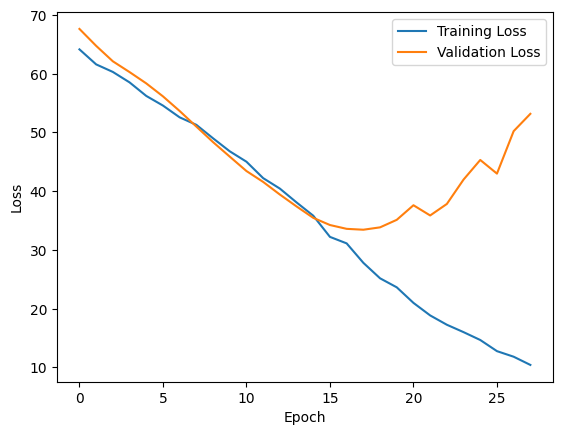

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
print(len(model.layers))

# Get the weights of the first layer
layer_weights = model.layers[0].get_weights()
print(layer_weights[0].shape)

# Check the shape of X_train
print(X_train.shape)

3
(5, 64)
(22, 5)


In [38]:
neurons = [8, 16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.1, 1]
results = []
for n in neurons:
    for lr in learning_rates:
        model = Sequential()
        model.add(Dense(n, activation='relu', input_dim=X_train.shape[1]))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=[early_stop])
        test_loss = model.evaluate(X_test, y_test)
        results.append({'neurons': n, 'lr': lr, 'test_loss': test_loss})

Epoch 1/100
2/2 [==============================] - 1s 187ms/step - loss: 54.4568 - val_loss: 60.5252
Epoch 2/100
2/2 [==============================] - 0s 54ms/step - loss: 54.3519 - val_loss: 60.4990
Epoch 3/100
2/2 [==============================] - 0s 53ms/step - loss: 54.1904 - val_loss: 60.4644
Epoch 4/100
2/2 [==============================] - 0s 48ms/step - loss: 54.0365 - val_loss: 60.4248
Epoch 5/100
2/2 [==============================] - 0s 43ms/step - loss: 53.8900 - val_loss: 60.3841
Epoch 6/100
2/2 [==============================] - 0s 47ms/step - loss: 53.7509 - val_loss: 60.3455
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 53.5976 - val_loss: 60.3091
Epoch 8/100
2/2 [==============================] - 0s 64ms/step - loss: 53.4499 - val_loss: 60.2720
Epoch 9/100
2/2 [==============================] - 0s 79ms/step - loss: 53.3058 - val_loss: 60.2294
Epoch 10/100
2/2 [==============================] - 0s 80ms/step - loss: 53.1581 - val_loss: 60.187

Text(0, 0.5, 'Test Loss')

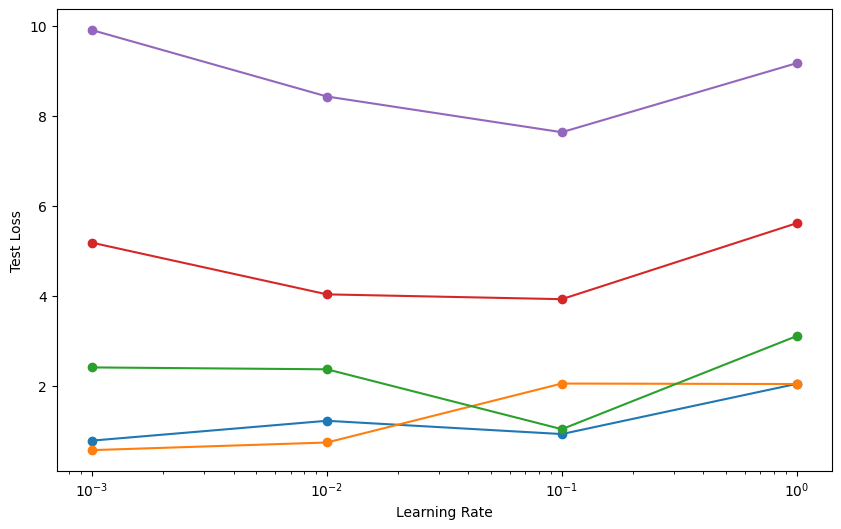

In [39]:
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
for n in neurons:
    df = results_df[results_df['neurons'] == n]
    plt.plot(df['lr'], df['test_loss'], '-o', label=f'{n} neurons')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Test Loss')

In [40]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)
     

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 19.9698

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 0s 104ms/step - loss: 19.9698 - val_loss: 0.9562
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 19.7509 - val_loss: 0.9783
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 19.5343 - val_loss: 1.0018
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 19.3222 - val_loss: 1.0264
Epoch 5/100
1/1 [==============================] - 0s 80ms/step - loss: 19.1146 - val_loss: 1.0525
Epoch 6/100
1/1 [==============================] - 0s 72ms/step - loss: 18.9104 - val_loss: 1.0803
Epoch 7/100
1/1 [==============================] - 0s 66ms/step - loss: 18.7063 - val_loss: 1.1097
Epoch 8/100
1/1 [==============================] - 0s 61ms/step - loss: 18.5040 - val_loss: 1.1404
Epoch 9/100
1/1 [==============================] - 0s 56ms/step - loss: 18.3054 - val_loss: 1.1724
Epoch 10/100
1/1 [==============================] - 0s 74ms/step - loss: 18.1094 - val_loss: 1.2051
Epoch 11/100
1/1 [==

In [41]:
from sklearn.metrics import mean_squared_error

# evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

1/1 [==============================] - 0s 71ms/step
MSE:  19.15387575393844


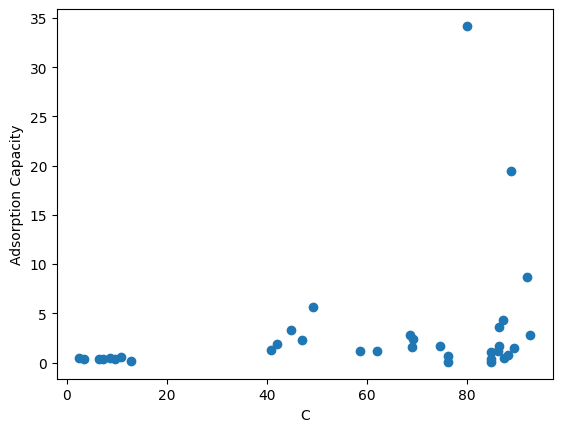

In [42]:
C = data['C(x1)']

# plot C vs adsorption capacity
plt.scatter(C, y)
plt.xlabel('C')
plt.ylabel('Adsorption Capacity')
plt.show()

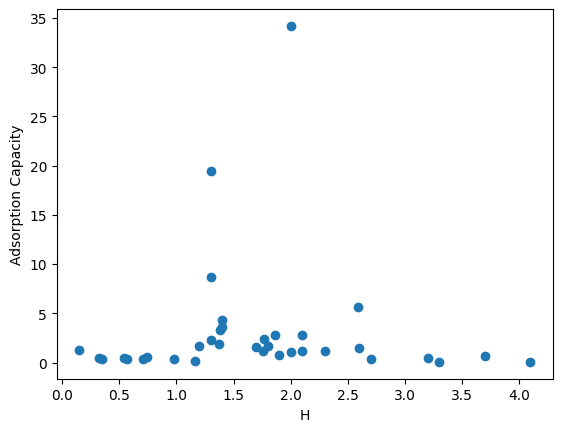

In [43]:
H = data['H(x2)']

# plot surface area vs adsorption capacity
plt.scatter(H, y)
plt.xlabel('H')
plt.ylabel('Adsorption Capacity')
plt.show()

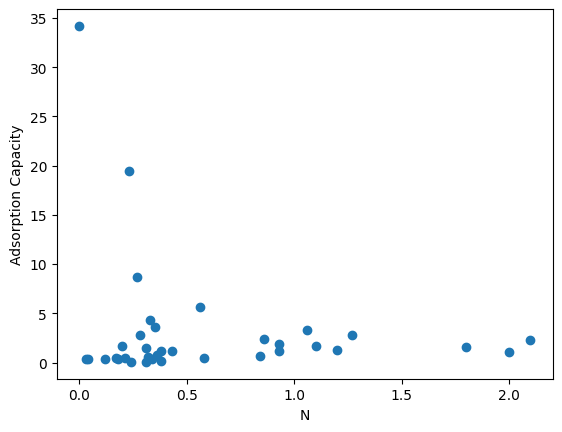

In [44]:
N = data['N(x3)']


# plot surface area vs adsorption capacity
plt.scatter(N, y)
plt.xlabel('N')
plt.ylabel('Adsorption Capacity')
plt.show()
     

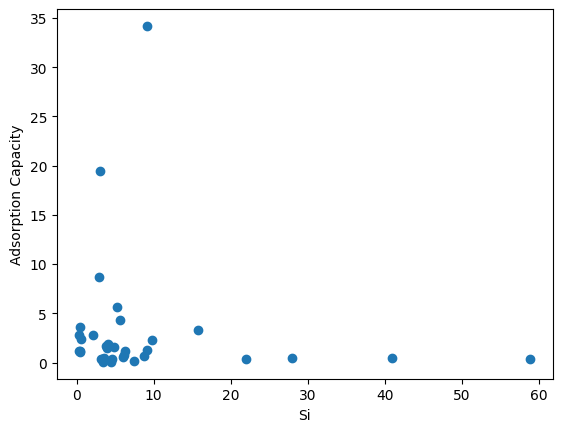

In [45]:
Si = data['Si(x4)']


# plot surface area vs adsorption capacity
plt.scatter(Si, y)
plt.xlabel('Si')
plt.ylabel('Adsorption Capacity')
plt.show()
     

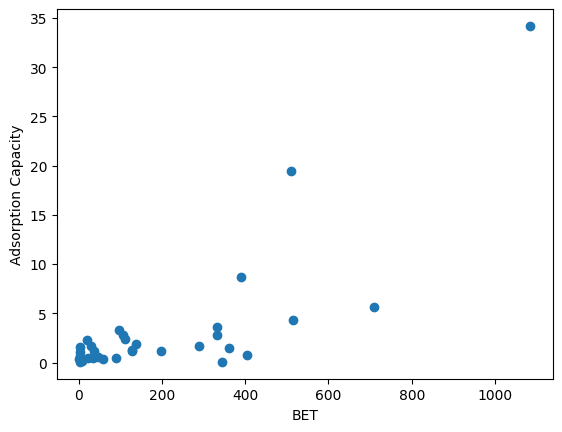

In [46]:
BET = data['BET(x5)']

# plot surface area vs adsorption capacity
plt.scatter(BET, y)
plt.xlabel('BET')
plt.ylabel('Adsorption Capacity')
plt.show()
     
